<a href="https://colab.research.google.com/github/terapyo1304/CVPR-lab-sem-6/blob/main/Lab_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files



In [2]:
uploaded=files.upload()

Saving king.jpeg to king.jpeg


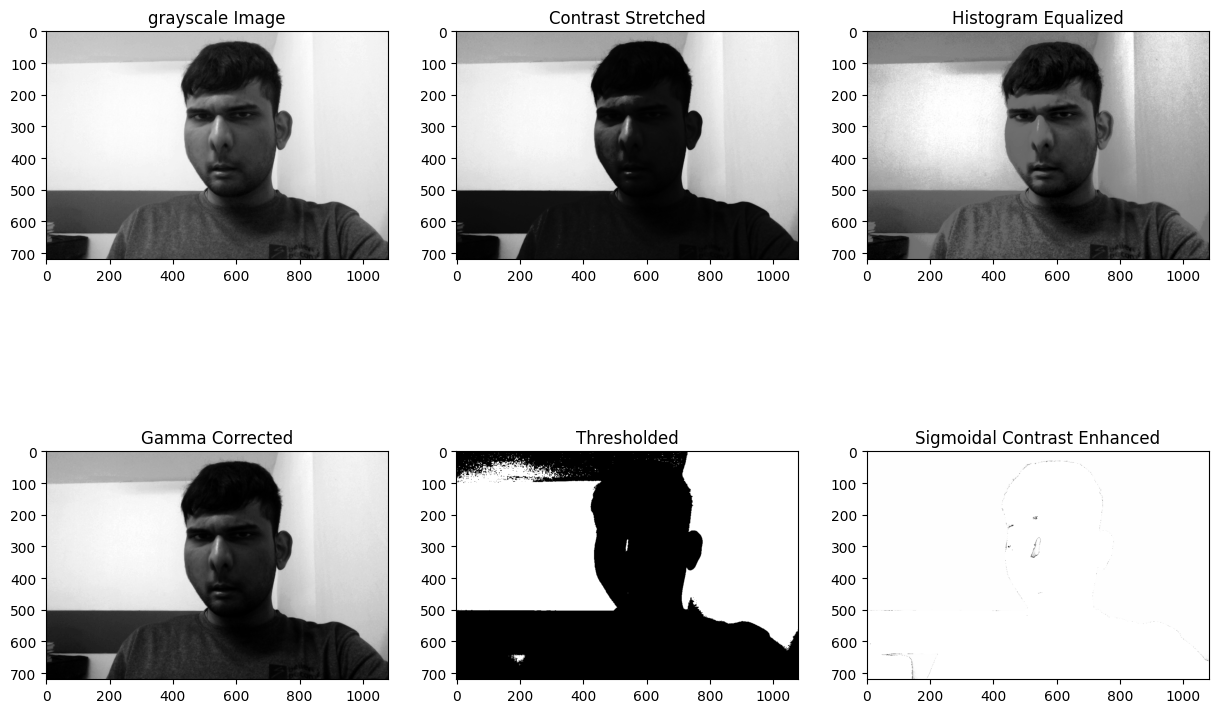

In [3]:
# Load the image
image = cv2.imread('king.jpeg', cv2.IMREAD_GRAYSCALE)

# 1. Contrast stretching
original = image.copy()
xp = [0, 64, 128, 192, 255]
fp = [0, 16, 128, 240, 255]
x = np.arange(256)
table = np.interp(x, xp, fp).astype('uint8')
stretched_image = cv2.LUT(image, table)

# 2. Histogram equalization
equalized_image = cv2.equalizeHist(image)

# 3. Gamma correction
gamma = 1.5
gamma_corrected_image = np.uint8(np.power((image / 255.0), gamma) * 255.0)

# 4. Thresholding
_, thresholded_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# 5. Sigmoidal contrast enhancement
def sigmoid(x, a, b):
    return 1 / (1 + np.exp(-a * (x - b)))

a = 0.5
b = 100
sigmoidal_image = 255 * sigmoid(image, a, b)
sigmoidal_image = sigmoidal_image.astype(np.uint8)

# Plotting the results
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.title('grayscale Image')
plt.imshow(image, cmap='gray')

plt.subplot(2, 3, 2)
plt.title('Contrast Stretched')
plt.imshow(stretched_image, cmap='gray')

plt.subplot(2, 3, 3)
plt.title('Histogram Equalized')
plt.imshow(equalized_image, cmap='gray')

plt.subplot(2, 3, 4)
plt.title('Gamma Corrected')
plt.imshow(gamma_corrected_image, cmap='gray')

plt.subplot(2, 3, 5)
plt.title('Thresholded')
plt.imshow(thresholded_image, cmap='gray')

plt.subplot(2, 3, 6)
plt.title('Sigmoidal Contrast Enhanced')
plt.imshow(sigmoidal_image, cmap='gray')

plt.show()
